load and check DDPN phrase localization

In [1]:
cd /mnt/fs1/mayu-ot/Experiments/loc_iparaphrasing/

/mnt/fs1/mayu-ot/Experiments/loc_iparaphrasing


In [2]:
import pandas as pd
import numpy as np
from imageio import imread, imsave

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from chainercv.visualizations import vis_bbox

/home/mayu-ot/miniconda3/envs/py36chainer/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
df = pd.read_csv('data/ddpn/train.csv', index_col=0)
df.head()

,"('gt', 'xmin')","('gt', 'ymin')","('gt', 'xmax')","('gt', 'ymax')","('pred', 'xmin')","('pred', 'ymin')","('pred', 'xmax')","('pred', 'ymax')",image,phrase
0,0.0,126.0,499.0,415.0,13.604919,127.082016,469.84637,433.78192,4896595765,outdoor tables
1,432.0,170.0,482.0,292.0,351.709380,37.429718,499.00000,327.76114,2830869109,a sprinkler
2,0.0,193.0,497.0,251.0,0.000000,185.087500,487.36847,253.62762,45876127,a wooden fence
3,179.0,233.0,310.0,410.0,167.513670,238.563900,324.55310,391.20874,3042612760,a metal pan
4,207.0,121.0,281.0,229.0,206.316360,119.168840,277.93842,236.18794,486016665,two woman


In [5]:
index = pd.MultiIndex.from_product([['gt', 'pred'], ['xmin', 'ymin', 'xmax', 'ymax']])
roi_df = df.iloc[:, :8]
roi_df = pd.DataFrame(roi_df.values, columns=index)
roi_df.head()

gt                             pred                                  
    xmin   ymin   xmax   ymax        xmin        ymin       xmax       ymax
0    0.0  126.0  499.0  415.0   13.604919  127.082016  469.84637  433.78192
1  432.0  170.0  482.0  292.0  351.709380   37.429718  499.00000  327.76114
2    0.0  193.0  497.0  251.0    0.000000  185.087500  487.36847  253.62762
3  179.0  233.0  310.0  410.0  167.513670  238.563900  324.55310  391.20874
4  207.0  121.0  281.0  229.0  206.316360  119.168840  277.93842  236.18794

In [6]:
meta_df = df.iloc[:, 8:]

(-0.5, 499.5, 272.5, -0.5)

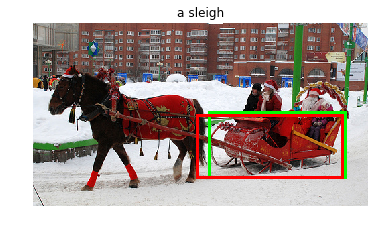

In [168]:
i = np.random.randint(len(df))
img, phrase = meta_df.iloc[i]
im = imread('data/flickr30k-images/%i.jpg'%img)

gt_roi = roi_df.loc[i,'gt']
pred_roi = roi_df.loc[i,'pred']
bbox= np.vstack([gt_roi, pred_roi])[:, [1, 0, 3, 2]]

vis_bbox(im.transpose(2, 0, 1), bbox, label=[0, 1], instance_colors=[[0,255,0], [255,0,0]])
plt.title(phrase)
plt.axis('off')

In [11]:
ddpn_df = pd.concat([pd.read_csv('data/ddpn/%s.csv'%split, index_col=0) for split in ['train', 'val', 'test']])

In [20]:
splits = []
for i, row in ddpn_df.iterrows():
    s = [split for split in ['train', 'val', 'test'] if row['image'] in indices[split]]
    if len(s) > 1:
        raise RuntimeError(row['image'])
    if len(s) == 0:
        s = [None]
    splits.append(s[0])

In [22]:
ddpn_df['split'] = splits
ddpn_df.head()

,"('gt', 'xmin')","('gt', 'ymin')","('gt', 'xmax')","('gt', 'ymax')","('pred', 'xmin')","('pred', 'ymin')","('pred', 'xmax')","('pred', 'ymax')",image,phrase,split
0,0.0,126.0,499.0,415.0,13.604919,127.082016,469.84637,433.78192,4896595765,outdoor tables,train
1,432.0,170.0,482.0,292.0,351.709380,37.429718,499.00000,327.76114,2830869109,a sprinkler,train
2,0.0,193.0,497.0,251.0,0.000000,185.087500,487.36847,253.62762,45876127,a wooden fence,train
3,179.0,233.0,310.0,410.0,167.513670,238.563900,324.55310,391.20874,3042612760,a metal pan,train
4,207.0,121.0,281.0,229.0,206.316360,119.168840,277.93842,236.18794,486016665,two woman,train


In [24]:
for split in ['train', 'val', 'test']:
    sub_df = ddpn_df[ddpn_df.split == split]
    sub_df.to_csv('data/ddpn/fix_split_%s.csv'%split)

In [9]:
indices = {}
for split in ['train', 'val', 'test']:
    df = pd.read_csv('data/phrase_pair_%s.csv'%split)
    indices[split] = pd.unique(df.image)

In [56]:
df = pd.read_csv('data/ddpn/fix_split_test.csv', index_col=0)
df.head()

,"('gt', 'xmin')","('gt', 'ymin')","('gt', 'xmax')","('gt', 'ymax')","('pred', 'xmin')","('pred', 'ymin')","('pred', 'xmax')","('pred', 'ymax')",image,phrase,split
38,26.0,85.0,444.0,277.0,21.639862,77.306244,494.31155,264.67120,4801764348,a row of chairs,test
42,19.0,25.0,388.0,257.0,20.565033,16.610321,416.78830,277.84357,3597715122,an ice cream shop,test
103,102.0,21.0,322.0,331.0,75.724260,14.133987,332.76184,378.72137,5199439325,a boy,test
161,19.0,224.0,202.0,459.0,25.830284,203.196870,205.37988,467.26987,116409198,a mountaineer,test
166,67.0,2.0,189.0,333.0,72.371410,0.000000,179.61938,333.00000,4734146340,a pole,test


In [65]:
bbox_df = pd.DataFrame(df.iloc[:, 4:10].values, columns=['xmin', 'ymin', 'xmax', 'ymax', 'image', 'phrase'])
bbox_df.head()

,xmin,ymin,xmax,ymax,image,phrase
0,21.6399,77.3062,494.312,264.671,4801764348,a row of chairs
1,20.565,16.6103,416.788,277.844,3597715122,an ice cream shop
2,75.7243,14.134,332.762,378.721,5199439325,a boy
3,25.8303,203.197,205.38,467.27,116409198,a mountaineer
4,72.3714,0,179.619,333,4734146340,a pole
